# Métodos de envoltorio

Los métodos de envoltura tienen algunas ventajas sobre los métodos de filtro. La principal ventaja es que los métodos de envoltura evalúan las características en función de su rendimiento con un modelo específico. Los métodos de filtro, por otro lado, no pueden decir qué tan importante es una característica para un modelo.

### Selección de avance secuencial

La selección hacia adelante secuencial es un método contenedor que crea un conjunto de funciones comenzando sin funciones y luego agregando una función a la vez hasta alcanzar la cantidad deseada de funciones. En el primer paso, el algoritmo entrenará y probará un modelo utilizando solo una función a la vez. El algoritmo mantiene la característica que funciona mejor.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
df=pd.read_csv("MODELAJE2.txt",sep="\t")
df = df.fillna(value=0)
X = df.drop(columns=["CONSULTA","BGI"])
y = df["BGI"]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr, 
          k_features=3,
          forward=True,
          floating= False,
          scoring = "accuracy",
          cv=0)
# Fit the equential forward selection model
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(3, 3), scoring='accuracy')

In [3]:
print(sfs.subsets_[3]['feature_names'])

# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[3]['avg_score'])


('AA59', 'AA172', 'AA1490')
0.8514492753623188


El parámetro k_featuresdetermina cuántas funciones seleccionará el algoritmo.


forward=Truey floating=False asegúrese de que estamos utilizando la selección de avance secuencial.


scoring determina cómo el algoritmo evaluará cada subconjunto de características. A menudo está bien usar el valor predeterminado None porque mlxtend usará automáticamente una métrica adecuada para cualquier modelo de scikit-learn que esté usando. 


cv permite hacer una validación cruzada k-fold. Lo dejaremos en 0 y solo evaluaremos el rendimiento en el conjunto de entrenamiento.

plot_sfs(sfs.get_metric_dict())para crear una figura de matplotlib que represente el rendimiento del modelo en función de la cantidad de funciones utilizadas.

C:\Users\ameya\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ameya\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


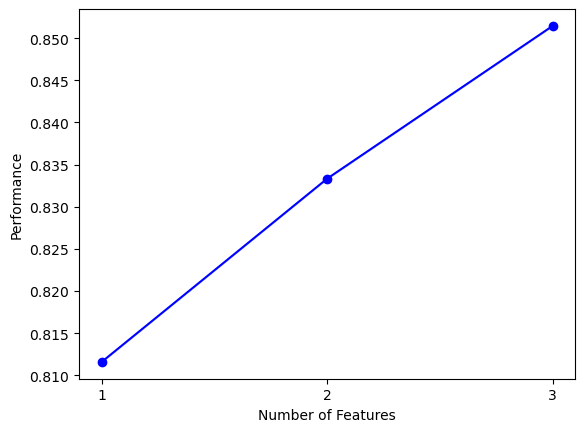

In [4]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

plot_sfs(sfs.get_metric_dict())
plt.show()


### Selección secuencial hacia atrás con mlxtend

La selección hacia atrás secuencial es otro método contenedor para la selección de características. Es muy similar a la selección secuencial hacia adelante, pero hay una diferencia clave. En lugar de comenzar sin funciones y agregar una función a la vez, la selección hacia atrás secuencial comienza con todas las funciones disponibles y elimina una función a la vez.

In [ ]:
# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)
sbs.fit(X, y)

# Evaluate the result of sequential backward selection
print(sbs.subsets_[3]['feature_names'])
print(sbs.subsets_[3]['avg_score'])

# Plot the model accuracy
plot_sfs(sbs.get_metric_dict())
plt.show()

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ameya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Selección flotante secuencial hacia adelante y hacia atrás
La selección flotante secuencial hacia adelante es una variación de la selección secuencial hacia adelante. Comienza con cero funciones y agrega una función a la vez, al igual que la selección de avance secuencial, pero después de cada adición, verifica si podemos mejorar el rendimiento eliminando una función.

Si no se puede mejorar el rendimiento, el algoritmo flotante continuará con el siguiente paso y agregará otra función.
Si se puede mejorar el rendimiento, el algoritmo hará la eliminación que mejore el rendimiento al máximo (a menos que la eliminación de esa función lleve a un ciclo infinito de agregar y eliminar la misma función una y otra vez).

### Eliminación de características recursivas con scikit-learn

La eliminación recursiva de características es otro método contenedor para la selección de características. Comienza entrenando un modelo con todas las características disponibles. Luego clasifica cada función de acuerdo con una métrica de importancia y elimina la función menos importante. Luego, el algoritmo entrena el modelo en el conjunto de características más pequeño, clasifica esas características y elimina la menos importante. El proceso se detiene cuando se alcanza el número deseado de características.

En los problemas de regresión, las características se clasifican según el tamaño del valor absoluto de sus coeficientes. Por ejemplo, supongamos que entrenamos un modelo de regresión con cinco características y obtuvimos los siguientes coeficientes de regresión.

Es importante tener en cuenta que es posible que deba estandarizar los datos antes de realizar la eliminación recursiva de funciones. En problemas de regresión en particular, es necesario estandarizar los datos para que la escala de características no afecte el tamaño de los coeficientes.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
X = StandardScaler().fit_transform(X)

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)


In [ ]:
print(rfe.ranking_)

 El 5(el rango más alto en la matriz) en el índice 1 significa (la función en el índice 1) se eliminó primero. El índice 2 significa (la función del índice 2) se eliminó en el siguiente paso, y así sucesivamente.

In [ ]:
print(rfe.support_)

In [ ]:
X = df.drop(columns=["CONSULTA","BGI"])

In [ ]:
feature_list = list(X.columns)
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]

# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.score(X, y))